In [9]:
import fastf1 as ff1
from fastf1 import utils
from fastf1.core import Laps
from fastf1 import plotting

from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection


import numpy as np

import pandas as pd

from timple.timedelta import strftimedelta

In [10]:
from driver_comparisons import main, plot_driver_speed_change, fastest_lap_comparison#, get_driver_lap_comparison

In [11]:
# Setup plotting
plotting.setup_mpl()

# Enable the cache
ff1.Cache.enable_cache('/Users/cameronstevens/Documents/Coding/F1_2022_race_analytics/cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None 

In [12]:
# we only want support for timedelta plotting in this example
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

In [13]:
#This loads the session for the Miami Grand prix Qualifiers

year, grand_prix, session = 2022, 'Emilia Romagna', 'Q'

quali = ff1.get_session(year, grand_prix, session)
quali.load() # This is new with Fastf1 v.2.2

core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '4', '20', '14', '3', '11', '77', '5', '55', '63', '47', '44', '24', '18', '22', '10', '6', '31', '23']


In [14]:
emilia_race = main(2022, "Emilia Romagna", "R")

core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '63', '77', '16', '22', '5', '20', '18', '23', '10', '44', '31', '24', '6', '47', '3', '14', '55']


In [15]:
quali_lap_df = quali.laps[['LapTime','Driver','Team','Compound','Sector1Time', 'Sector2Time', 'Sector3Time']]

quali_lap_df = quali_lap_df.dropna()
quali_lap_df



,LapTime,Driver,Team,Compound,Sector1Time,Sector2Time,Sector3Time
1,0 days 00:01:25.515000,VER,Red Bull Racing,INTERMEDIATE,0 days 00:00:26.791000,0 days 00:00:29.703000,0 days 00:00:29.021000
4,0 days 00:01:21.487000,VER,Red Bull Racing,SOFT,0 days 00:00:26.384000,0 days 00:00:27.552000,0 days 00:00:27.551000
5,0 days 00:01:20.349000,VER,Red Bull Racing,SOFT,0 days 00:00:26.051000,0 days 00:00:27.324000,0 days 00:00:26.974000
6,0 days 00:01:39.582000,VER,Red Bull Racing,SOFT,0 days 00:00:29.737000,0 days 00:00:39.035000,0 days 00:00:30.810000
7,0 days 00:01:42.174000,VER,Red Bull Racing,SOFT,0 days 00:00:29.269000,0 days 00:00:34.467000,0 days 00:00:38.438000
...,...,...,...,...,...,...,...
337,0 days 00:01:22.338000,OCO,Alpine,SOFT,0 days 00:00:26.480000,0 days 00:00:28.024000,0 days 00:00:27.834000
338,0 days 00:01:42.155000,OCO,Alpine,SOFT,0 days 00:00:28.908000,0 days 00:00:32.804000,0 days 00:00:40.443000
339,0 days 00:02:02.266000,OCO,Alpine,SOFT,0 days 00:00:54.647000,0 days 00:00:37.095000,0 days 00:00:30.524000
340,0 days 00:02:10.303000,OCO,Alpine,SOFT,0 days 00:00:26.648000,0 days 00:00:27.980000,0 days 00:01:15.675000


In [16]:
def driver_lap_comparison(driver_1, driver_2):
    
    '''This function is to take telementry data from each driver, and compare the respective
    lap times in regard to fastest lap time data.'''

    # Laps can now be accessed through the .laps object coming from the session
    laps_driver_1 = quali.laps.pick_driver(driver_1)
    laps_driver_2 = quali.laps.pick_driver(driver_2)

    # Select the fastest lap
    fastest_driver_1 = laps_driver_1.pick_fastest()
    fastest_driver_2 = laps_driver_2.pick_fastest()

    # Retrieve the telemetry and add the distance column
    telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
    telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

    # Make sure whe know the team name for coloring
    team_driver_1 = fastest_driver_1['Team']
    team_driver_2 = fastest_driver_2['Team']

    # extract delta time
    delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)



    plot_size = [15, 15]
    plot_title = f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1} VS {driver_2}"
    #plot_ratios = [1, 3, 2, 1, 1, 2]
    plot_ratios = [1, 3, 2, 1, 1, 2, 1, 2]
    plot_filename = plot_title.replace(" ", "") + ".png"




    # Make plot a bit bigger
    plt.rcParams['figure.figsize'] = plot_size


    # Create subplots with different sizes
    #fig, ax = plt.subplots(6, gridspec_kw={'height_ratios': plot_ratios})
    # Create subplots with different sizes which includes DRS data
    fig, ax = plt.subplots(8, gridspec_kw={'height_ratios': plot_ratios})


    # Set the plot title
    ax[0].title.set_text(plot_title)


    # Delta line
    ax[0].plot(ref_tel['Distance'], delta_time)
    ax[0].axhline(0)
    ax[0].set(ylabel=f"Gap to {driver_2} (s)")

    # Speed trace
    ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
    ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
    ax[1].set(ylabel='Speed')
    ax[1].legend(loc="lower right")

    # Throttle trace
    ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
    ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
    ax[2].set(ylabel='Throttle')

    # Brake trace
    ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
    ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
    ax[3].set(ylabel='Brake')

    # Gear trace
    ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
    ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
    ax[4].set(ylabel='Gear')

    # RPM trace
    ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
    ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
    ax[5].set(ylabel='RPM')

    # DRS trace
    ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
    ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
    ax[6].set(ylabel='DRS')
    ax[6].set(xlabel='Lap distance (meters)')


    ax[7].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Time'],  label=driver_1, color=ff1.plotting.team_color(team_driver_1))
    ax[7].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Time'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
    ax[7].set(ylabel='Laptime', xlabel='Lap')
    ax[7].legend(loc="upper center")


    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for a in ax.flat:
        a.label_outer()
        
    # Store figure
    plt.savefig(plot_filename, dpi=300)

# Would be nice to have a conditional statement that ensures the colours are not the same
    if ff1.plotting.team_color(team_driver_1) == ff1.plotting.team_color(team_driver_2):
        print('Same Team Color')
    
    plt.show()

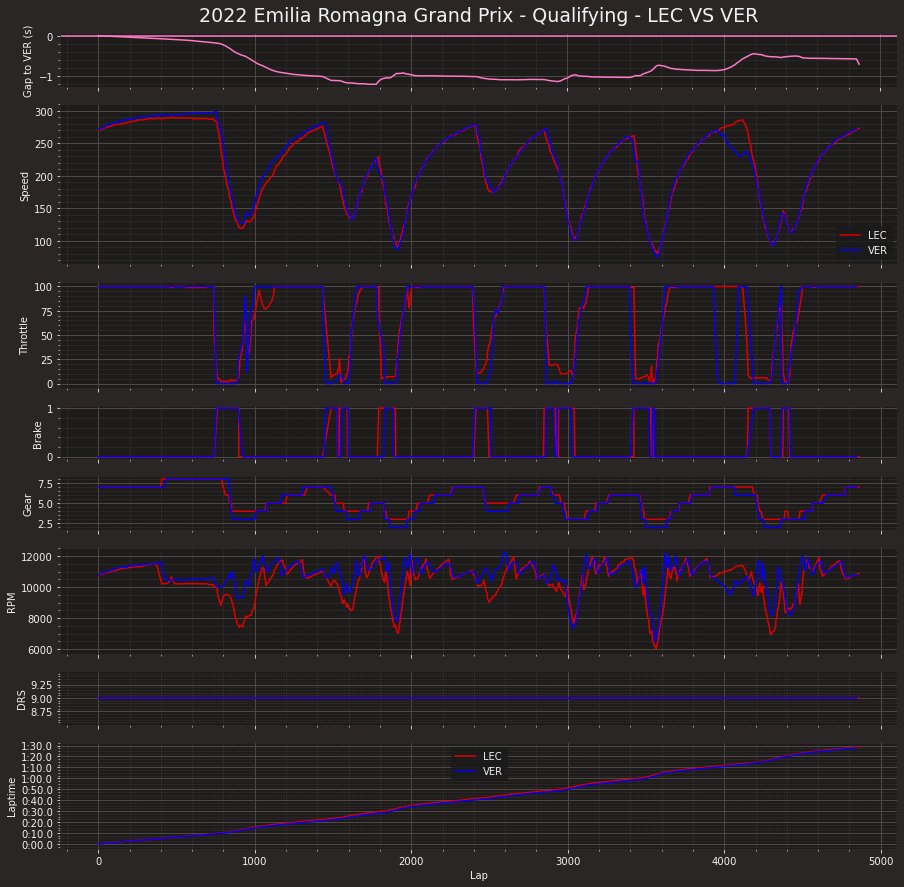

In [17]:
driver_lap_comparison("LEC","VER")

In [18]:
quali.laps.pick_fastest()

Time                      0 days 00:50:20.635000
DriverNumber                                  55
LapTime                   0 days 00:01:18.990000
LapNumber                                     12
Stint                                          3
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:25.794000
Sector2Time               0 days 00:00:26.930000
Sector3Time               0 days 00:00:26.266000
Sector1SessionTime        0 days 00:49:27.439000
Sector2SessionTime        0 days 00:49:54.369000
Sector3SessionTime        0 days 00:50:20.635000
SpeedI1                                    222.0
SpeedI2                                    257.0
SpeedFL                                    276.0
SpeedST                                    293.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     3.0
FreshTyre           

In [19]:
qualilaps = quali.laps
qualilaps.columns

Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'LapStartTime', 'Team', 'Driver',
       'TrackStatus', 'IsAccurate', 'LapStartDate'],
      dtype='object')

In [20]:
quali.laps['Team'].unique()

array(['Red Bull Racing', 'Ferrari', 'McLaren', 'Haas F1 Team', 'Alpine',
       'Alfa Romeo', 'Aston Martin', 'Mercedes', 'AlphaTauri', 'Williams'],
      dtype=object)

In [21]:
drivers = pd.unique(quali.laps['Driver'])
print(drivers)

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = quali.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

# plot is nicer to look at and more easily understandable if we just plot the time differences.
#  Therefore we subtract the fastest lap time from all other lap times.
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    #color = ff1.plotting.
    team_colors.append(color)



fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{quali.event['EventName']} {quali.event.year} Quali\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

['VER' 'LEC' 'NOR' 'MAG' 'ALO' 'RIC' 'PER' 'BOT' 'VET' 'SAI' 'RUS' 'MSC'
 'HAM' 'ZHO' 'STR' 'TSU' 'GAS' 'LAT' 'OCO' 'ALB']


AttributeError: 'NaTType' object has no attribute 'upper'

In [ ]:
team_colors = list()
for index, l in fastest_laps.iterlaps():
  #  color = ff1.plotting.team_color(l['Team'])
#   #color = ff1.plotting.
    team_colors.append(color)

In [22]:
fastest_laps.iterlaps()

<generator object Laps.iterlaps at 0x7f8095738120>

In [23]:
def fastest_lap_comparison(driverX, driverY):
    
   

   driver_X = quali.laps.pick_driver(driverX).pick_fastest()
   driver_Y = quali.laps.pick_driver(driverY).pick_fastest()

   driver_X = driver_X.get_car_data().add_distance()
   driver_Y = driver_Y.get_car_data().add_distance()

   driverX_color = ff1.plotting.team_color("RBR")
   driverY_color = ff1.plotting.team_color("FER")

   fig, ax = plt.subplots()
   ax.plot(driver_X['Distance'], driver_X['Speed'], color=driverX_color, label=driverX)
   ax.plot(driver_Y['Distance'], driver_Y['Speed'], color=driverY_color, label=driverY)

   ax.set_xlabel('Distance in m')
   ax.set_ylabel('Speed in km/h')

   ax.legend()
   plt.suptitle(f"Fastest Lap Comparison \n "
               f"{quali.event['EventName']} {quali.event.year} QUALI")

   plt.show()
    

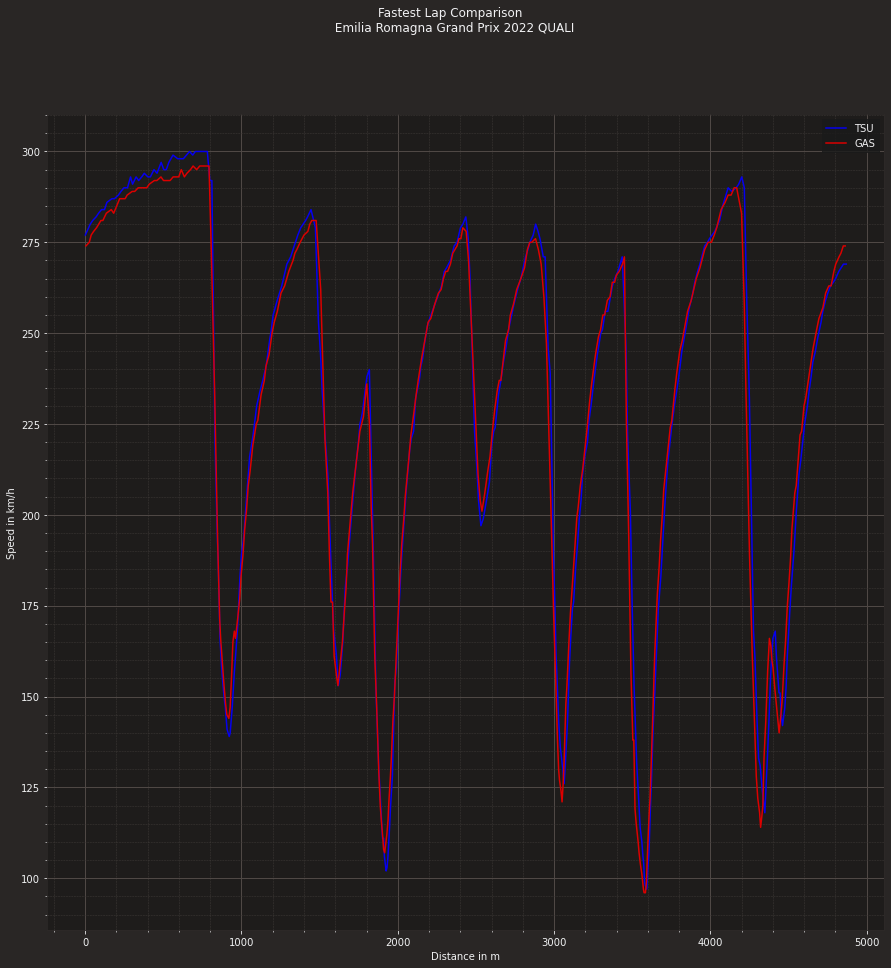

In [24]:
fastest_lap_comparison("TSU", "GAS")

In [27]:
def driver_speed_change(driver1):

    
    colormap = plt.cm.plasma

    lap = quali.laps.pick_driver(driver1).pick_fastest()

    # Get telemetry data
    x = lap.telemetry['X']              # values for x-axis
    y = lap.telemetry['Y']              # values for y-axis
    color = lap.telemetry['Speed']      # value to base color gradient on

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

        # We create a plot with title and adjust some setting to make it look good.
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
    fig.suptitle(f'{grand_prix} {year} - {driver1} - Speed', size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')


    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(color.min(), color.max())
    lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(color)

    # Merge all line segments together
    line = ax.add_collection(lc)


    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


    # Show the plot
    plt.show()

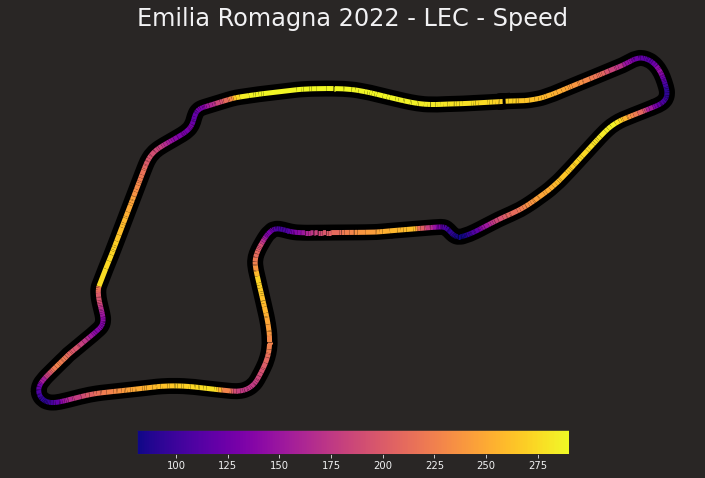

In [28]:
driver_speed_change("LEC")

In [ ]:
driver_speed_change('SAI')

In [ ]:
Driver_lap_comparison('LEC', "SAI")

In [29]:
#This loads the session for the Emilia Romagna Grand prix Race

year, grand_prix, session = 2022, 'Emilia Romagna', 'R'

session = ff1.get_session(year, grand_prix, session)
session.load() # This is new with Fastf1 v.2.2

core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '63', '77', '16', '22', '5', '20', '18', '23', '10', '44', '31', '24', '6', '47', '3', '14', '55']


In [30]:
drivers = pd.unique(session.laps['Driver'])
print(drivers)

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

# plot is nicer to look at and more easily understandable if we just plot the time differences.
#  Therefore we subtract the fastest lap time from all other lap times.
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)



fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Race\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

['VER' 'PER' 'NOR' 'RUS' 'BOT' 'LEC' 'TSU' 'VET' 'MAG' 'STR' 'ALB' 'GAS'
 'HAM' 'OCO' 'ZHO' 'LAT' 'MSC' 'RIC' 'ALO' 'SAI']


AttributeError: 'NaTType' object has no attribute 'upper'

In [31]:
def driver_speed_change(driver1):

    year = 2022
    ses = 'R'
    driver = 'VER'
    colormap = plt.cm.plasma

    lap = session.laps.pick_driver(driver1).pick_fastest()

    # Get telemetry data
    x = lap.telemetry['X']              # values for x-axis
    y = lap.telemetry['Y']              # values for y-axis
    color = lap.telemetry['Speed']      # value to base color gradient on

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

        # We create a plot with title and adjust some setting to make it look good.
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
    fig.suptitle(f'{grand_prix} {year} - {driver1} - Speed', size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')


    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(color.min(), color.max())
    lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(color)

    # Merge all line segments together
    line = ax.add_collection(lc)


    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


    # Show the plot
    plt.show()

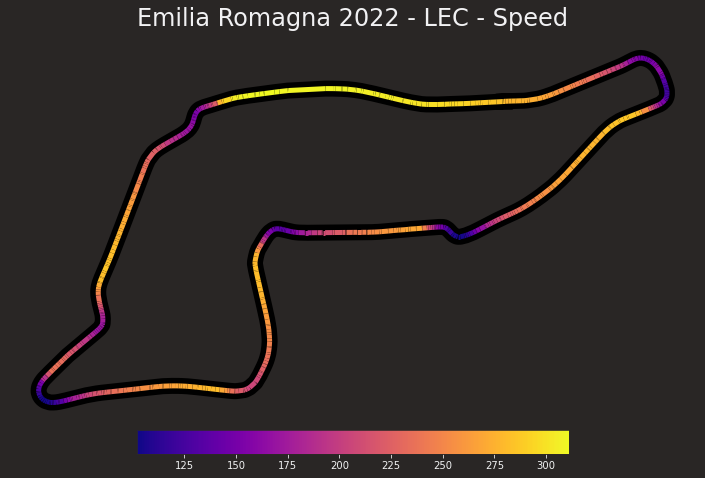

In [32]:
driver_speed_change("LEC")